# Standardizing Data

## Modeling without normalizing
Let's take a look at what might happen to your model's accuracy if you try to model data without doing some sort of standardization first. Here we have a subset of the wine dataset. One of the columns, Proline, has an extremely high variance compared to the other columns. This is an example of where a technique like log normalization would come in handy, which you'll learn about in the next section.

The scikit-learn model training process should be familiar to you at this point, so we won't go too in-depth with it. You already have a k-nearest neighbors model available (knn) as well as the X and y sets you need to fit and score on.

### init: 2 dataframes, 1 serie, train_test_split

In [1]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(wine, X, y)
tobedownloaded="{pandas.core.frame.DataFrame: {'X.csv': 'https://file.io/3ZCZFv',\
  'wine.csv': 'https://file.io/bUhQJw'},\
 pandas.core.series.Series: {'y.csv': 'https://file.io/pRaVBM'}}"
prefix='data_from_datacamp/Chap1-Exercise4.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

In [2]:
import pandas as pd
wine=pd.read_csv(prefix+'wine.csv',index_col=0)
X=pd.read_csv(prefix+'X.csv',index_col=0)
y=pd.read_csv(prefix+'y.csv',index_col=0, header=None,squeeze=True)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

### code

In [4]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the k-nearest neighbors model to the training data
knn.fit(X_train, y_train)

# Score the model on the test data
print(knn.score(X_test, y_test))

0.6444444444444445


# Log normalization

## Checking the variance
Check the variance of the columns in the wine dataset. Out of the four columns listed in the multiple choice section, which column is a candidate for normalization?

### init: 1 dataframe

In [5]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(wine)
tobedownloaded="{pandas.core.frame.DataFrame: {'wine.csv': 'https://file.io/Q03qGi'}}"
prefix='data_from_datacamp/Chap2-Exercise2.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"wine.csv": "https://file.io/Q03qGi"}}
{'pandas.core.frame.DataFrame': {'wine.csv': 'https://file.io/Q03qGi'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 12172    0 12172    0     0  17717      0 --:--:-- --:--:-- --:--:-- 17743


In [6]:
import pandas as pd
wine=pd.read_csv(prefix+'wine.csv',index_col=0)

### code

In [7]:
wine.describe()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


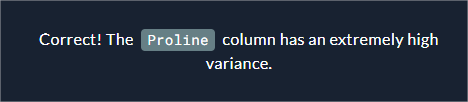

## Log normalization in Python
Now that we know that the Proline column in our wine dataset has a large amount of variance, let's log normalize it.

Numpy has been imported as np in your workspace.

### code

In [9]:
import numpy as np

In [11]:
# Print out the variance of the Proline column
print(wine.Proline.var())

# Apply the log normalization function to the Proline column
wine['Proline_log'] = np.log(wine.Proline)

# Check the variance of the Proline column again
print(wine.Proline_log.var())

99166.71735542428
0.17231366191842018


# Scaling data for feature comparison


## Scaling data - investigating columns
We want to use the Ash, Alcalinity of ash, and Magnesium columns in the wine dataset to train a linear model, but it's possible that these columns are all measured in different ways, which would bias a linear model. Using describe() to return descriptive statistics about this dataset, which of the following statements are true about the scale of data in these columns?

In [12]:
wine.describe()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Proline_log
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,6.530303
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.415107
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,5.627621
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,6.215606
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,6.512486
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,6.892642
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,7.426549


## Scaling data - standardizing columns
Since we know that the Ash, Alcalinity of ash, and Magnesium columns in the wine dataset are all on different scales, let's standardize them in a way that allows for use in a linear model.

### code

In [15]:
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Create the scaler
ss = StandardScaler()

# Take a subset of the DataFrame you want to scale 
wine_subset = wine[['Ash', 'Alcalinity of ash', 'Magnesium']]

# Apply the scaler to the DataFrame subset
wine_subset_scaled = ss.fit_transform(wine_subset)

# Standardized data and modeling
 

## KNN on non-scaled data
Let's first take a look at the accuracy of a K-nearest neighbors model on the wine dataset without standardizing the data. The knn model as well as the X and y data and labels sets have been created already. Most of this process of creating models in scikit-learn should look familiar to you.

### init: 1 dataframe, 1 serie, knn

In [16]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(X, y)
tobedownloaded="{pandas.core.frame.DataFrame: {'X.csv': 'https://file.io/D13sbX'},\
 pandas.core.series.Series: {'y.csv': 'https://file.io/9Cn904'}}"
prefix='data_from_datacamp/Chap2-Exercise4.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"X.csv": "https://file.io/D13sbX"}, pandas.core.series.Series: {"y.csv": "https://file.io/9Cn904"}}
{'pandas.core.frame.DataFrame': {'X.csv': 'https://file.io/D13sbX'}, 'pandas.core.series.Series': {'y.csv': 'https://file.io/9Cn904'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11811    0 11811    0     0  15065      0 --:--:-- --:--:-- --:--:-- 15065
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   958    0   958    0     0   3193      0 --:--:-- --:--:-- --:--:--  3204


In [17]:
import pandas as pd
X=pd.read_csv(prefix+'X.csv',index_col=0)
y=pd.read_csv(prefix+'y.csv',index_col=0, header=None,squeeze=True)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

### code

In [19]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the k-nearest neighbors model to the training data
knn.fit(X_train, y_train)

# Score the model on the test data
print(knn.score(X_test, y_test))

0.7333333333333333


## KNN on scaled data
The accuracy score on the unscaled wine dataset was decent, but we can likely do better if we scale the dataset. The process is mostly the same as the previous exercise, with the added step of scaling the data. Once again, the knn model as well as the X and y data and labels set have already been created for you.

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
# Create the scaling method.
ss = StandardScaler()

# Apply the scaling method to the dataset used for modeling.
X_scaled = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

# Fit the k-nearest neighbors model to the training data.
knn.fit(X_train, y_train)

# Score the model on the test data.
print(knn.score(X_test, y_test))

0.9333333333333333
